# Data Viz Project

### Imports

In [32]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv("C:/Users/adrie/Documents/ENSIMAG/Visualisation de l'Information/Projet d3.js/Fichier CSV/data_animaux.csv", 
    sep=";", header=0)

In [34]:
for col in ['date_of_birth', 'datetime', 'monthyear']:
    data[col] = pd.to_datetime(data[col])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   age_upon_outcome  78248 non-null  object        
 1   animal_id         78256 non-null  object        
 2   animal_type       78256 non-null  object        
 3   breed             78256 non-null  object        
 4   color             78256 non-null  object        
 5   date_of_birth     78256 non-null  datetime64[ns]
 6   datetime          78256 non-null  datetime64[ns]
 7   monthyear         78256 non-null  datetime64[ns]
 8   name              54370 non-null  object        
 9   outcome_subtype   35963 non-null  object        
 10  outcome_type      78244 non-null  object        
 11  sex_upon_outcome  78254 non-null  object        
dtypes: datetime64[ns](3), object(9)
memory usage: 7.2+ MB


### Création de données

In [36]:
liste_pays = ["New York", "Las Vegas", "Atlanta", "Chicago", "Dallas",
              "Phoenix", "Seattle", "Denver", "Miami", "Minneapolis"]
liste_df = []

for i in range(data.shape[0]) : 
    liste_df.append(random.sample(liste_pays,1))

df_city = pd.DataFrame(liste_df, columns=['city'])
df_city.shape

(78256, 1)

In [37]:
#Merge city columns to initial data
data = pd.concat([data, df_city], axis=1)

In [38]:
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,city
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,2014-07-22 16:04:00,NaN,Partner,Transfer,Intact Male,Denver
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,2013-11-07 11:47:00,Lucy,Partner,Transfer,Spayed Female,Minneapolis
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,2014-06-03 14:20:00,*Johnny,NaN,Adoption,Neutered Male,Phoenix
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,2014-06-15 15:50:00,Monday,Partner,Transfer,Neutered Male,Dallas
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07,2014-07-07 14:04:00,2014-07-07 14:04:00,NaN,Rabies Risk,Euthanasia,Unknown,Chicago


In [39]:
#Create function to map height and weight with animal_type
def animal_height(animal_type):
    if animal_type == "Cat" :
        return np.random.randint(15,30)
    if animal_type == "Dog" :
        return np.random.randint(15,110)
    if animal_type == "Other" :
        return np.random.randint(15,90)
    if animal_type == "Bird" :
        return np.random.randint(8,50)
    else :
        return np.random.randint(10,25)
    
    
def animal_weight(animal_type):
    if animal_type == "Cat" :
        return np.random.randint(3,8)
    if animal_type == "Dog" :
        return np.random.randint(8,40)
    if animal_type == "Other" :
        return np.random.randint(2,22)
    if animal_type == "Bird" :
        return np.random.randint(1,4)
    else :
        return np.random.randint(1,32)

In [40]:
#Add height and weight to the dataframe
data['height_cm'] = data['animal_type'].map(animal_height)
data['weight_kg'] = data['animal_type'].map(animal_weight)
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,city,height_cm,weight_kg
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,2014-07-22 16:04:00,NaN,Partner,Transfer,Intact Male,Denver,25,6
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,2013-11-07 11:47:00,Lucy,Partner,Transfer,Spayed Female,Minneapolis,17,21
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,2014-06-03 14:20:00,*Johnny,NaN,Adoption,Neutered Male,Phoenix,19,34
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,2014-06-15 15:50:00,Monday,Partner,Transfer,Neutered Male,Dallas,70,8
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07,2014-07-07 14:04:00,2014-07-07 14:04:00,NaN,Rabies Risk,Euthanasia,Unknown,Chicago,15,11


### Eploratory aata analysis

C:\Users\adrie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adrie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight_kg', ylabel='Density'>

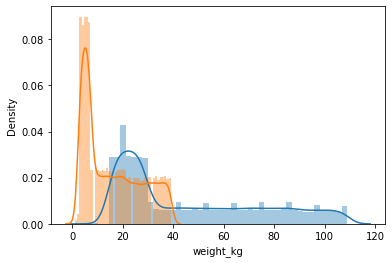

In [41]:
#Height and weight distribution 
sns.distplot(data['height_cm'])
sns.distplot(data['weight_kg'])

<AxesSubplot:>

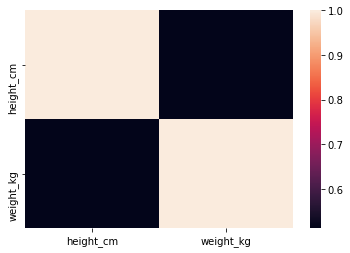

In [42]:
sns.heatmap(data.corr())
#correlation neear to 0

Text(0, 0.5, 'number of births')

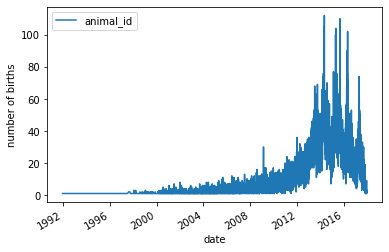

In [43]:
#Number of birth per year
data.groupby('date_of_birth').agg({'animal_id':'count'}).plot()
plt.xlabel('date')
plt.ylabel('number of births')

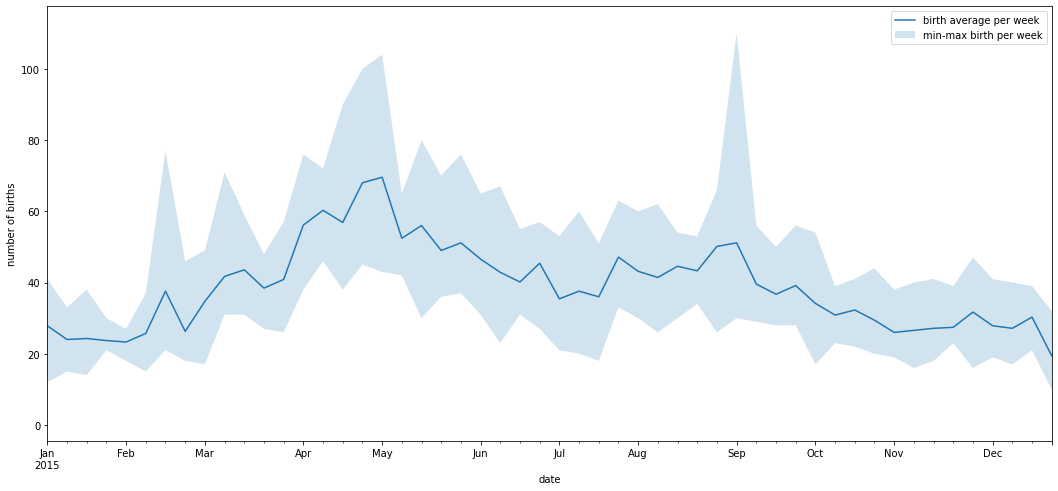

In [44]:
#Count the birth per year
var = data.groupby('date_of_birth').agg({'animal_id' : 'count'})
#Put in date variable the mean, min and max birth per week
date = var['animal_id'].resample('W').agg(['mean', 'min', 'max'])
#Plot year 2015
plt.figure(figsize = (18,8))
date['mean']['2015'].plot(label='birth average per week')
plt.fill_between(date.index, date['max'], date['min'], alpha=0.2, label='min-max birth per week')
plt.xlabel('date')
plt.ylabel('number of births')
plt.legend()
plt.show()

### Création de dataframe pour les exporter

In [52]:
#Height and weight per animal type
df1 = data.groupby(['animal_type']).agg({'height_cm' : 'mean', 'weight_kg' : 'mean'}).reset_index()
df1.head()

,animal_type,height_cm,weight_kg
0,Bird,28.910180,1.976048
1,Cat,21.997009,5.002379
2,Dog,61.993151,23.440486
3,Livestock,16.555556,10.000000
4,Other,52.130148,11.551189


In [55]:
#Number of animal per animal type and city
df2 = data.groupby(['city','animal_type']).agg({'animal_id' : 'count'}).reset_index()
df2.head()

,city,animal_type,animal_id
0,Atlanta,Bird,31
1,Atlanta,Cat,2973
2,Atlanta,Dog,4397
3,Atlanta,Other,441
4,Chicago,Bird,29


In [58]:
df3 = date.reset_index()
df3.head()

,date_of_birth,mean,min,max
0,1991-12-15,1.0,1.0,1.0
1,1991-12-22,NaN,NaN,NaN
2,1991-12-29,NaN,NaN,NaN
3,1992-01-05,NaN,NaN,NaN
4,1992-01-12,NaN,NaN,NaN


In [46]:
df4 = data.groupby(['outcome_type','animal_type']).agg({'animal_id' : 'count'}).reset_index()
df4.head()

,outcome_type,animal_type,animal_id
0,Adoption,Bird,114
1,Adoption,Cat,12732
2,Adoption,Dog,20052
3,Adoption,Livestock,2
4,Adoption,Other,212


In [59]:
#Export en csv des dataframes créés
df1.to_csv("animal_height_weight.csv", index=False)
df2.to_csv("animal_city.csv", index=False)
df3.to_csv("animal_birth.csv", index=False)
df4.to_csv("animal_count.csv", index=False)